# ASSIGNMENT 1

# EXERCISE 1

In [4]:
import matplotlib.pyplot as plt
import yfinance as yf
import datetime
import numpy as np
import pandas as pd


In [5]:
ticker = "AAPL"

start_date = "2010-01-01"
end_date = datetime.datetime.now().strftime("%Y-%m-%d")

data = yf.download(ticker, start=start_date, end=end_date)
S = np.array(data['Close'])

[*********************100%***********************]  1 of 1 completed


In [7]:
data.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2010-01-04,6.440331,6.455077,6.391279,6.422877,493729600
2010-01-05,6.451466,6.487879,6.417460,6.458087,601904800
2010-01-06,6.348847,6.477046,6.342226,6.451466,552160000
2010-01-07,6.337108,6.379842,6.291065,6.372318,477131200
2010-01-08,6.379241,6.379843,6.291368,6.328684,447610800


In [8]:
def mu(S):
    """Mean return of the stock"""
    S_k1 = S[1:]
    S_k = S[:-1]
    diff = S_k1 - S_k
    relative_diff = diff / S_k
    return np.mean(relative_diff)

def rolling_mu(S, window):
    """Mean return of the stock using a rolling window"""
    return np.array([mu(S[i-window:i]) for i in range(window, len(S) + 1)])

def s2(S):
    """Variance of the stock"""
    S_k1 = S[1:]
    S_k = S[:-1]
    diff = S_k1 - S_k
    relative_diff = diff / S_k
    return np.var(relative_diff, ddof=1)

def rolling_s2(S, window):
    """Variance of the stock using a rolling window"""
    return np.array([s2(S[i-window:i]) for i in range(window, len(S) + 1)])

def s_parkinson(data):
    """Parkinson volatility estimate"""
    h = np.array(data['High'])
    l = np.array(data['Low'])
    N = len(S)
    return np.sqrt(1 / (4 * N * np.log(2)) * np.sum(np.log(h / l) ** 2))

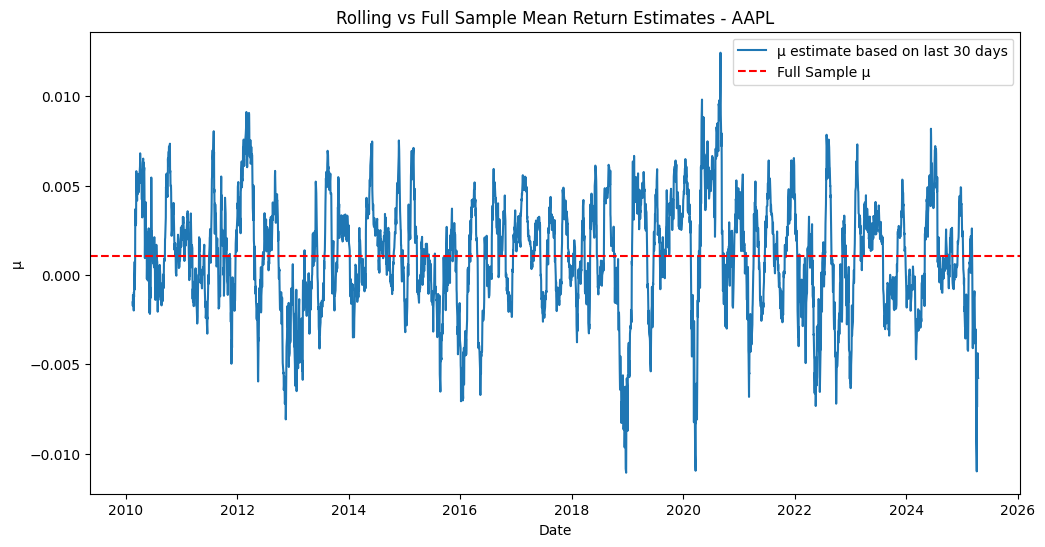

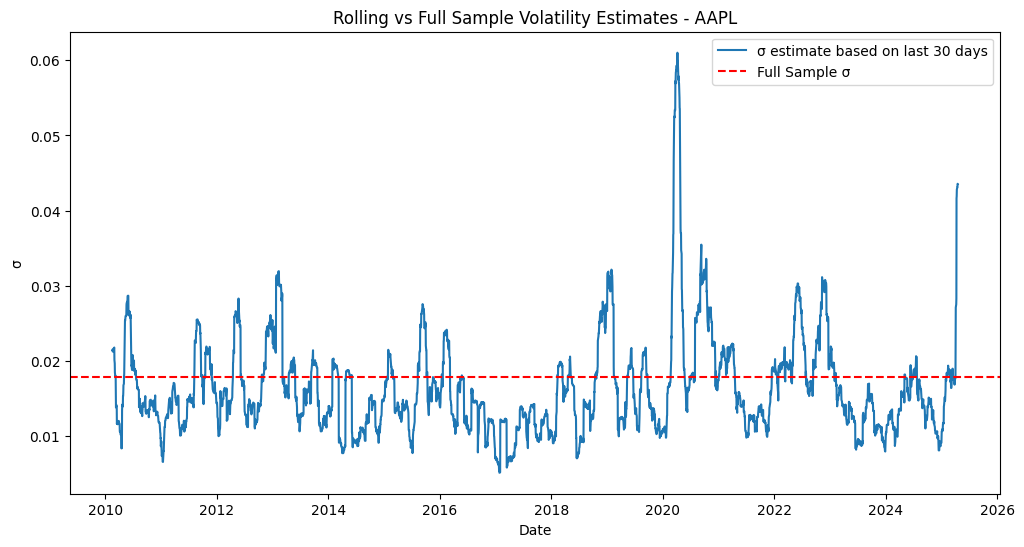

In [9]:
# Calculate mean and variance using adjusted close
mu_adj = mu(S)
s2_adj = s2(S)

window = 30

# Calculate rolling estimates for adjusted close
mu_hats_adj = rolling_mu(S, window)
s2_hats_adj = rolling_s2(S, window)

# Plot adjusted close mu estimates
plt.figure(figsize=(12,6))
plt.plot(data.index[window-1:], mu_hats_adj, label=f'μ estimate based on last {window} days')
plt.axhline(y=mu_adj, color='r', linestyle='--', label='Full Sample μ')
plt.title(f'Rolling vs Full Sample Mean Return Estimates - {ticker}')
plt.xlabel('Date')
plt.ylabel('μ')
plt.legend()
plt.show()

# Plot adjusted close volatility estimates
plt.figure(figsize=(12,6))
plt.plot(data.index[window-1:], np.sqrt(s2_hats_adj), label=f'σ estimate based on last {window} days')
plt.axhline(y=np.sqrt(s2_adj), color='r', linestyle='--', label='Full Sample σ')
plt.title(f'Rolling vs Full Sample Volatility Estimates - {ticker}')
plt.xlabel('Date')
plt.ylabel('σ')
plt.legend()
plt.show()

In [10]:
mu_hat = mu(S)
s2_hat = s2(S)
s_parkinson_hat = s_parkinson(data)

HIER NOG MEER UITLEG

In [11]:
print(f"Full sample mean return estimate: {mu_hat:.5f}")
print(f"Parkinson volatility estimate: {s_parkinson_hat:.5f}")
print(f"Sample standard deviation estimate: {np.sqrt(s2_hat):.5f}")
print(f"\nRatio of Parkinson to sample variance: {s_parkinson_hat/np.sqrt(s2_hat):.5f}")


Full sample mean return estimate: 0.00105
Parkinson volatility estimate: 0.01417
Sample standard deviation estimate: 0.01788

Ratio of Parkinson to sample variance: 0.79241


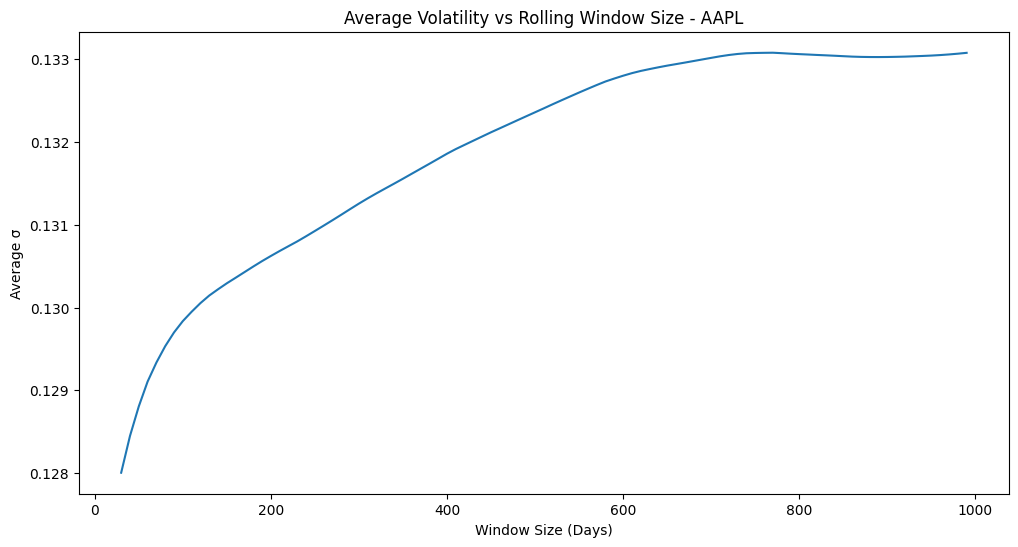

In [13]:
windows = np.arange(30, 1000, 10)
s2_hats = [np.sqrt(np.mean(np.sqrt(rolling_s2(S, window)))) for window in windows]
# Plot average volatility vs window size
plt.figure(figsize=(12,6))
plt.plot(windows, s2_hats)
plt.title(f'Average Volatility vs Rolling Window Size - {ticker}')
plt.xlabel('Window Size (Days)')
plt.ylabel('Average σ')
plt.show()


In [14]:
from skfolio.datasets import load_sp500_dataset, load_sp500_implied_vol_dataset
from skfolio.preprocessing import prices_to_returns

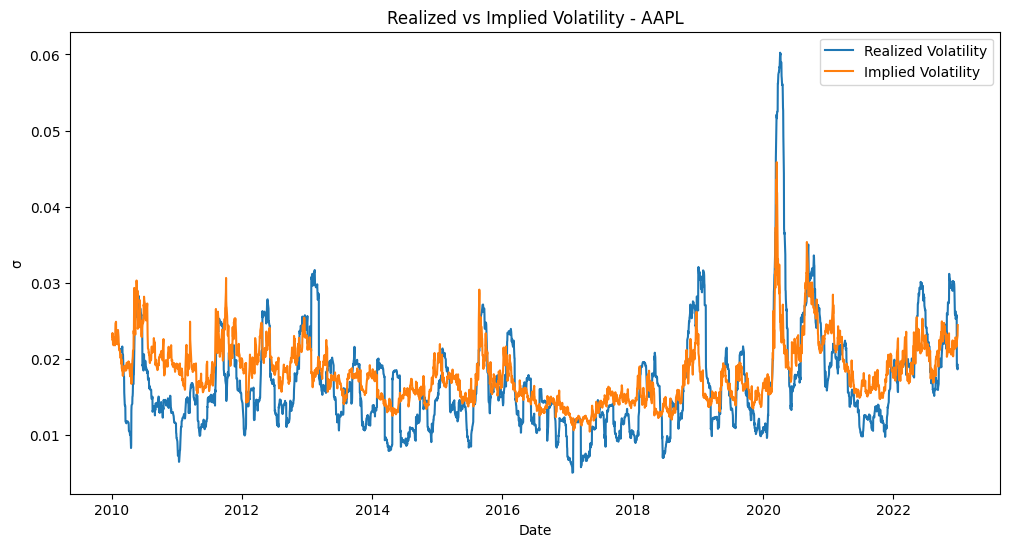

In [15]:
prices = load_sp500_dataset()
implied_vol = load_sp500_implied_vol_dataset()
X = prices_to_returns(prices)
X = X.loc["2010":]
implied_vol = implied_vol[ticker] / np.sqrt(252)

window = 30

plt.figure(figsize=(12,6))



realized_vol = X[ticker].rolling(window=window).std().dropna()
plt.plot(realized_vol.index, realized_vol, label='Realized Volatility')
plt.plot(implied_vol.index, implied_vol, label='Implied Volatility')

plt.title(f'Realized vs Implied Volatility - {ticker}')
plt.xlabel('Date')
plt.ylabel('σ')
plt.legend()
plt.show()

HIER MOET OOK NOG UILEG BIJ

=================================================================================

# EXERCISE 2

## 2.1

Here we solve the Black-Scholes PDE, given by:

\begin{align}
    r C(s, t) = \frac{\partial C}{\partial t}(s, t) + r s \frac{\partial C}{\partial s}(s, t) + \frac{\sigma^2}{2} s^2 \frac{\partial^2 C}{\partial s^2}(s, t), \notag
\end{align}

where $r\geq 0$ denotes the risk-free interest rate, $s>0$, and $t \in[0,T]$. The terminal condition is given by:

\begin{align}
    C(s,T)=s^2. \notag
\end{align}

We try a solution of the form $C(s,t) = s^2f(t)$, and determine $f(t)$.


We substitute the given solution and take derivatives accordingly to obtain:

\begin{align}
    r s^2f(t) = s^2 f'(t) + 2rs^2f(t) + \sigma^2s^2f(t) \notag\\
    f(t)(rs^2 - 2rs^2 - \sigma^2s^2) = s^2f'(t) \notag\\
    f'(t) = (-r-\sigma^2)f(t) \notag
\end{align}

This is an ODE we can solve, we obtain:

\begin{align}
f(t) = A\cdot \text{exp}\{-(r+\sigma^2)t\}. \notag
\end{align}

We use the given terminal condition to find the value for $A$:

\begin{align}
C(s,T) = s^2f(T) = s^2 \notag\\
A\cdot \text{exp}\{-(r+\sigma^2)T\} = 1\notag\\
A = \text{exp}\{(r+\sigma^2)T\} \notag
\end{align}

It follows the Black-Scholes PDE is solved for the following solution:

\begin{align}
    C(s,t) = s^2 \cdot \text{exp}\{(r+\sigma^2)(T-t)\} . \notag
\end{align}

## 2.2

Here, we determine the replicating portfolio. Specifically, we determine the portfolio holdings $\xi_t$ and $\eta_t$ in the risky asset $S_t$ and the riskless asset $A_t$ (with $A_t = A_0e^{rt}$) such that the portfolio:

\begin{align}
V_t = C(S_t, t) = ξ_tS_t + η_tA_t, \quad 0 ≤ t ≤ T, \notag
\end{align}

replicates the derivative contract with payoff:

\begin{align}
C(S_T , T ) = (S_T )^2. \notag
\end{align}

Notice that the payoff of the claim depens solely on the value of the stock at the terminal value $T$, hence the claim is European. It follows that theorem 6.11 from [1] (or theorem 5.4 from [2]) applies.

In question (2.1) we have already solved the Black-Scholes PDE with the correct boundary condition $C(s,T)=s^2$. Hence, it follows by theorem 6.12 from [1] (or, again theorem 5.4 from [2]) directly that for $t\in[0,T]$:

\begin{align}
    \xi_t = \frac{\partial}{\partial s}\Big(s^2 \cdot \text{exp}\{(r+\sigma^2)(T-t)\}\Big)\Big\vert_{s=S_t} = 2S_t\cdot \text{exp}\{(r+\sigma^2)(T-t)\}, \notag
\end{align}
and
\begin{align}
    \eta_t = \text{exp}\{-rt  \}\big(s^2 \cdot \text{exp}\{(r+\sigma^2)(T-t)\} - \xi_t S_t\big)\Big\vert_{s=S_t} = \text{exp}\{-rt\}\Big(-S_t^2 \cdot \text{exp}\{(r+\sigma^2)(T-t) \}  \Big). \notag
\end{align}


Just in case, we check whether this portfolio matches the payoff.

We have:

\begin{align}
    V_t &= ξ_tS_t + η_tA_t \notag \\
    &= 2 S_t^2 \text{exp}\{(r+\sigma^2)(T-t) \} \;+\;\text{exp}\{rt\}\text{exp}\{-rt\}\Big(-S_t^2 \cdot \text{exp}\{(r+\sigma^2)(T-t)\} \Big) \notag \\
    &= S_t^2 \text{exp}\{(r+\sigma^2)(T-t)\}. \notag
\end{align}

It follows that in $t=T$, we have:

\begin{align}
    S_T^2\text{exp}\{(r+\sigma^2)(T-T)\} = S_T^2 \text{exp}\{0\} = S_T^2, \notag
\end{align}

Such that the payoff has been replicated correctly.

============================================================================================================================================================

## EXERCISE 3

============================================================================================================================================================

# REFERENCES

[1] Boshuizen, F., van der Vaart, A., van Zanten, H., Banachewicz, K., Zareba, P., Belitser, E., & Serra, P. (2023). Lecture notes for the course: Stochastic processes for finance. Last updated August 4, 2023.

[2] Spreij, P. J. C. Introduction to stochastic finance in continuous time. (https://staff.fnwi.uva.nl/p.j.c.spreij/onderwijs/Hedging_en_Derivaten/hdsyllabus.pdf)